<a href="https://colab.research.google.com/github/stratoskar/recipe_traffic_prediction/blob/main/recipe_traffic_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Show Basic Information About the Dataset

In [38]:
# make basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# read data
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/workspace/recipe_site_traffic_2212.csv"
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# show data
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [41]:
# show shape of the dataset
print('Shape of the dataset is:')
data.shape

Shape of the dataset is:


(947, 8)

In [42]:
# show what columns do we have
print("The dataset contains the following columns:")
data.columns

The dataset contains the following columns:


Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [43]:
# show what data types holds each column
print("Data types of every column:")
data.dtypes

Data types of every column:


,0
recipe,int64
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
category,object
servings,object
high_traffic,object


In [44]:
# show distinct categories of recipies in the dataset
print("Unique Categories of recipies:")
print(data['category'].unique())

Unique Categories of recipies:
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


## Data Cleaning and Organization

### Inspect the Label (target) Column

In [45]:
print(data['high_traffic'].value_counts())
print(f"\nNumber of Null values in hight_traffic column: {data.high_traffic.isnull().sum()}")

high_traffic
High    574
Name: count, dtype: int64

Number of Null values in hight_traffic column: 373


In [46]:
data['high_traffic'].head()

,high_traffic
0,High
1,High
2,NaN
3,High
4,NaN


Our label column, **high_traffic**, has two possible values: **High** and **Nan**. High indicates that the site traffic was high when the specific recipe was presented. We can assume that the Nan represents the Non High Site Traffic. We encode these two values in numerical format:

In [47]:
# convert high_traffic (label) to binary (1 for High, 0 for Nan)
data['high_traffic'] = data['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

<ipython-input-48-4202f117fc25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='high_traffic', palette='viridis')
<ipython-input-48-4202f117fc25>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Not High Traffic', 'High Traffic'])


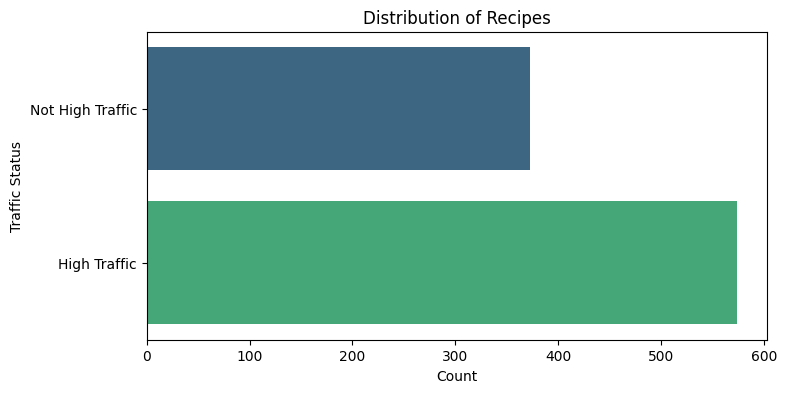

In [48]:
# make a countplot on the label column (high_traffic)
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, y='high_traffic', palette='viridis')
plt.title('Distribution of Recipes')
plt.xlabel('Count')
plt.ylabel('Traffic Status')
ax.set_yticklabels(['Not High Traffic', 'High Traffic'])

plt.show()

The label column now contains two possible outcomes, High Traffic (indicated as 1) and Not High Traffic (indicated as 0). The problem can be considered as a binary classification problem. The two classes are imbalanced, so additional measures should be taken into account!

### Clean the Rest Dataset From Null Values

In [49]:
# print number of null values per column:
print("Dataset before cleaning null values:")
print(data.isna().sum())

Dataset before cleaning null values:
recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64


In [50]:
# show data where null values in protein occur
filtered_data = data[data['protein'].isnull()]
filtered_data.head(52)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,1
23,24,NaN,NaN,NaN,NaN,Meat,2,0
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,0
82,83,NaN,NaN,NaN,NaN,Meat,4,1
89,90,NaN,NaN,NaN,NaN,Pork,6,1
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,1
121,122,NaN,NaN,NaN,NaN,Dessert,2,1
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,1
149,150,NaN,NaN,NaN,NaN,Potato,2,1
187,188,NaN,NaN,NaN,NaN,Pork,4,1


We tried to observe the null values in only one column. However, it seems that 52 rows lack 4 values in important columns. So the best practice is to drop them!

In [51]:
# drop null values
data = data.dropna()

In [52]:
# print number of null values per column:
print("Dataset after cleaning null values:")
print(data.isna().sum())

Dataset after cleaning null values:
recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


Now, we dont have any null values in the dataset!

### Drop Unecessary Columns

In [53]:
# show data
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1


In [54]:
# check if recipe column is an auto-increament column
data.recipe.nunique() == data.shape[0]

True

The recipe column does not offer nothing usefull to the model, it only serves as an identifier column, so we drop it from the dataset.

In [55]:
# drop recipe column (it is an auto increament field)
data.drop(['recipe'],axis=1,inplace=True)

<ipython-input-55-b572d655b225>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['recipe'],axis=1,inplace=True)


### Convert Serving Column to Numerical

In [56]:
# servings column does not contain only numerical values
data['servings'].value_counts()

,count
servings,
4,365
6,184
2,174
1,169
4 as a snack,2
6 as a snack,1


In [57]:
# clean the servings column (convert everything to numerical)
data['servings'] = data['servings'].astype(str).str.extract('(\d+)')[0].astype(float)

<ipython-input-57-9f3baf63225c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['servings'] = data['servings'].astype(str).str.extract('(\d+)')[0].astype(float)


In [58]:
# check again the values of servings column
data['servings'].value_counts()

,count
servings,
4.0,367
6.0,185
2.0,174
1.0,169


### Deal with Categorical Data

In [59]:
# view distinct values and counts of the category column
data['category'].value_counts()

,count
category,
Breakfast,106
Chicken Breast,94
Beverages,92
Potato,83
Lunch/Snacks,82
Vegetable,78
Dessert,77
Meat,74
Pork,73


It would be better to reduce the number of categories classifying *distinct* but *similar* categories in *one new category*.

In [60]:
# define category mapping
category_mapping = {
    "Breakfast": "Meal",
    "Lunch/Snacks": "Meal",
    "One Dish Meal": "Meal",
    "Chicken Breast": "Protein",
    "Chicken": "Protein",
    "Meat": "Protein",
    "Pork": "Protein",
    "Beverages": "Beverage",
    "Potato": "Vegetable",
    "Vegetable": "Vegetable",
    "Dessert": "Dessert"
}

# apply the mapping
data["Category Grouped"] = data["category"].map(category_mapping)
data.drop("category",axis=1,inplace=True)

<ipython-input-60-752c3c75fac3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category Grouped"] = data["category"].map(category_mapping)
<ipython-input-60-752c3c75fac3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("category",axis=1,inplace=True)


In [61]:
# show values of Category Grouped column after grouping of distinct values
data['Category Grouped'].value_counts()

,count
Category Grouped,
Protein,310
Meal,255
Vegetable,161
Beverage,92
Dessert,77


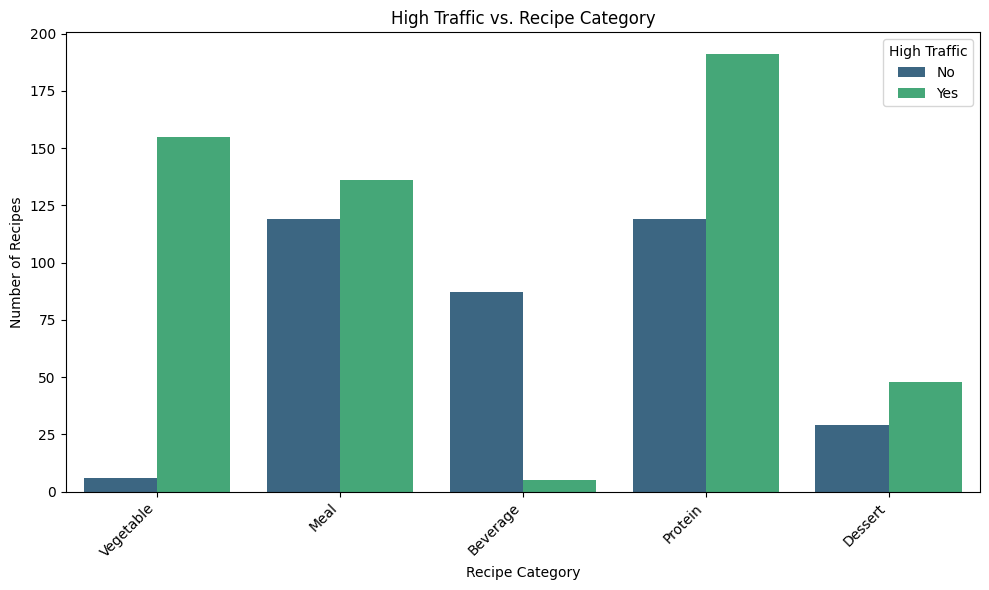

In [62]:
plt.figure(figsize=(10, 6))  # adjust figure size as needed
sns.countplot(data=data, x='Category Grouped', hue='high_traffic', palette='viridis')
plt.title('High Traffic vs. Recipe Category')
plt.xlabel('Recipe Category')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.legend(title='High Traffic', labels=['No', 'Yes'])  # assuming 0 is 'No', 1 is 'Yes'
plt.tight_layout()
plt.show()

Now, we have 5 distinct categories.

The graph above reveals that 'Meal' and 'Protein' recipes generally experience high traffic, while 'Vegetable' recipes tend to have lower traffic.  Beverage recipes show the lowest overall traffic.

This suggests recipe category significantly influences traffic, with potential implications for homepage content strategy.

At this moment, we can One Hot Encode the Category Grouped column to convert categorical data to numerical vectors:

In [25]:
# apply one hot encoding Category Grouped column
data = pd.get_dummies(data, columns=["Category Grouped"], prefix="Cat")

In [26]:
# show data
data.dtypes

,0
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
servings,float64
high_traffic,int64
Cat_Beverage,bool
Cat_Dessert,bool
Cat_Meal,bool
Cat_Protein,bool


As we can see, the new columns are of type bool. We will convert them to integers:

In [27]:
# convert boolean columns to integers
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

In [28]:
# show data types again
data.dtypes

,0
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
servings,float64
high_traffic,int64
Cat_Beverage,int64
Cat_Dessert,int64
Cat_Meal,int64
Cat_Protein,int64


Now, we are ready to begin creating new features from existing ones!

### Feature Engineering

We will try to  measure the importance of our existing features using the Random Forest Classifier

In [29]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
# split data to Features X and labels y
X = data.drop('high_traffic', axis=1) # use all the columns as features
y = data['high_traffic']

In [31]:
# initialize and train the model
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

In [32]:
# get feature importances
importances = rf.feature_importances_

# create a DataFrame to display results
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

         Feature  Importance
3        protein    0.216341
0       calories    0.174781
2          sugar    0.174641
1   carbohydrate    0.169895
9  Cat_Vegetable    0.088993
5   Cat_Beverage    0.087236
4       servings    0.048789
7       Cat_Meal    0.019725
8    Cat_Protein    0.012642
6    Cat_Dessert    0.006957


Now, we will **extract** *new features from the original ones* (feature engineering) and conduct the same experiment to observe the results:

In [33]:
# protein-to-carb ratio
data['protein_carb_ratio'] = data['protein'] / (data['carbohydrate'] + 1e-6)  # Adding small value to avoid division by zero
# this line calculates the ratio of protein to carbohydrates for each recipe.
# it adds a small value (1e-6) to the denominator to prevent division by zero errors if a recipe has 0 carbohydrates.

# sugar-to-calorie ratio
data['sugar_calorie_ratio'] = data['sugar'] / (data['calories'] + 1e-6)
# this line calculates the ratio of sugar to calories for each recipe.
# it also adds a small value (1e-6) to the denominator to prevent division by zero errors.

# protein density (protein per serving)
data['protein_density'] = data['protein'] / (data['servings'] + 1e-6)
# this line calculates the protein density, which represents the amount of protein per serving.
# it adds a small value (1e-6) to the denominator to prevent division by zero errors.

# healthiness score (higher protein, lower sugar)
data['health_score'] = data['protein'] - data['sugar']
# this line creates a "healthiness score" by subtracting the sugar content from the protein content.
# a higher score suggests a healthier recipe (more protein, less sugar).

# energy density score
data['energy_score'] = (data['calories'] + data['carbohydrate']) / (data['servings'] + 1e-6)
# this line calculates the energy density score, which represents the total energy (calories + carbohydrates) per serving.
# it adds a small value (1e-6) to the denominator to prevent division by zero errors.

In [34]:
# prepare new feature set
X_new = data.drop('high_traffic', axis=1)
y = data['high_traffic']

# train and evaluate
rf_new = RandomForestClassifier(n_estimators=50, random_state=42)
rf_new.fit(X_new, y)

# get new importances
new_importances = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': rf_new.feature_importances_
}).sort_values('Importance', ascending=False)

print(new_importances)

                Feature  Importance
3               protein    0.110810
12      protein_density    0.101237
13         health_score    0.089189
0              calories    0.088865
9         Cat_Vegetable    0.086192
10   protein_carb_ratio    0.085630
1          carbohydrate    0.082899
2                 sugar    0.082274
11  sugar_calorie_ratio    0.079969
14         energy_score    0.079097
5          Cat_Beverage    0.059814
4              servings    0.022188
7              Cat_Meal    0.017339
8           Cat_Protein    0.010015
6           Cat_Dessert    0.004481


Despite these new features not showing strong importance in classification, we will keep them for predictions, as more data can sometimes improve model performance.

## Make Visualizations

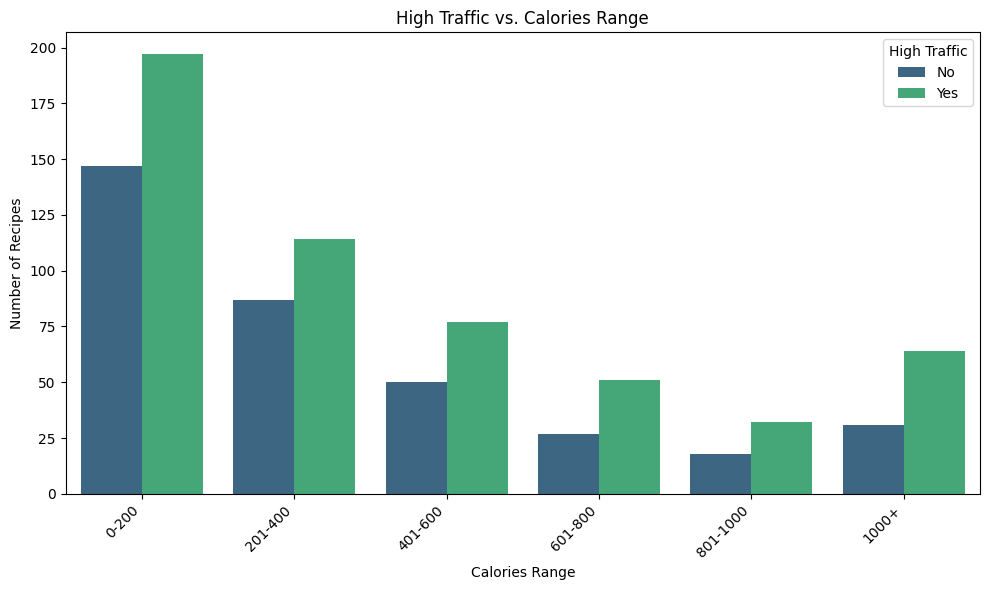

In [72]:
calorie_bins = [0, 200, 400, 600, 800, 1000, float('inf')]  # 7 bin edges
calorie_labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1000+']  # 6 labels

plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x=pd.cut(data['calories'], bins=calorie_bins, labels=calorie_labels, right=True),
    hue='high_traffic',
    palette='viridis'
)
plt.title('High Traffic vs. Calories Range')
plt.xlabel('Calories Range')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='High Traffic', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

The graph illustrates a general trend of decreasing high traffic with increasing calorie ranges, where recipes in the lower ranges ("0-400") exhibit a higher likelihood of attracting traffic compared to those with higher calorie counts. This suggests a potential inverse relationship between calorie content and recipe popularity.

In [35]:
# select numerical columns
numerical_cols = ['calories','carbohydrate',
                  'sugar',	'protein',
                  'servings',	'protein_carb_ratio',
                  'sugar_calorie_ratio',
                  'protein_density',
                  'health_score',	'energy_score']

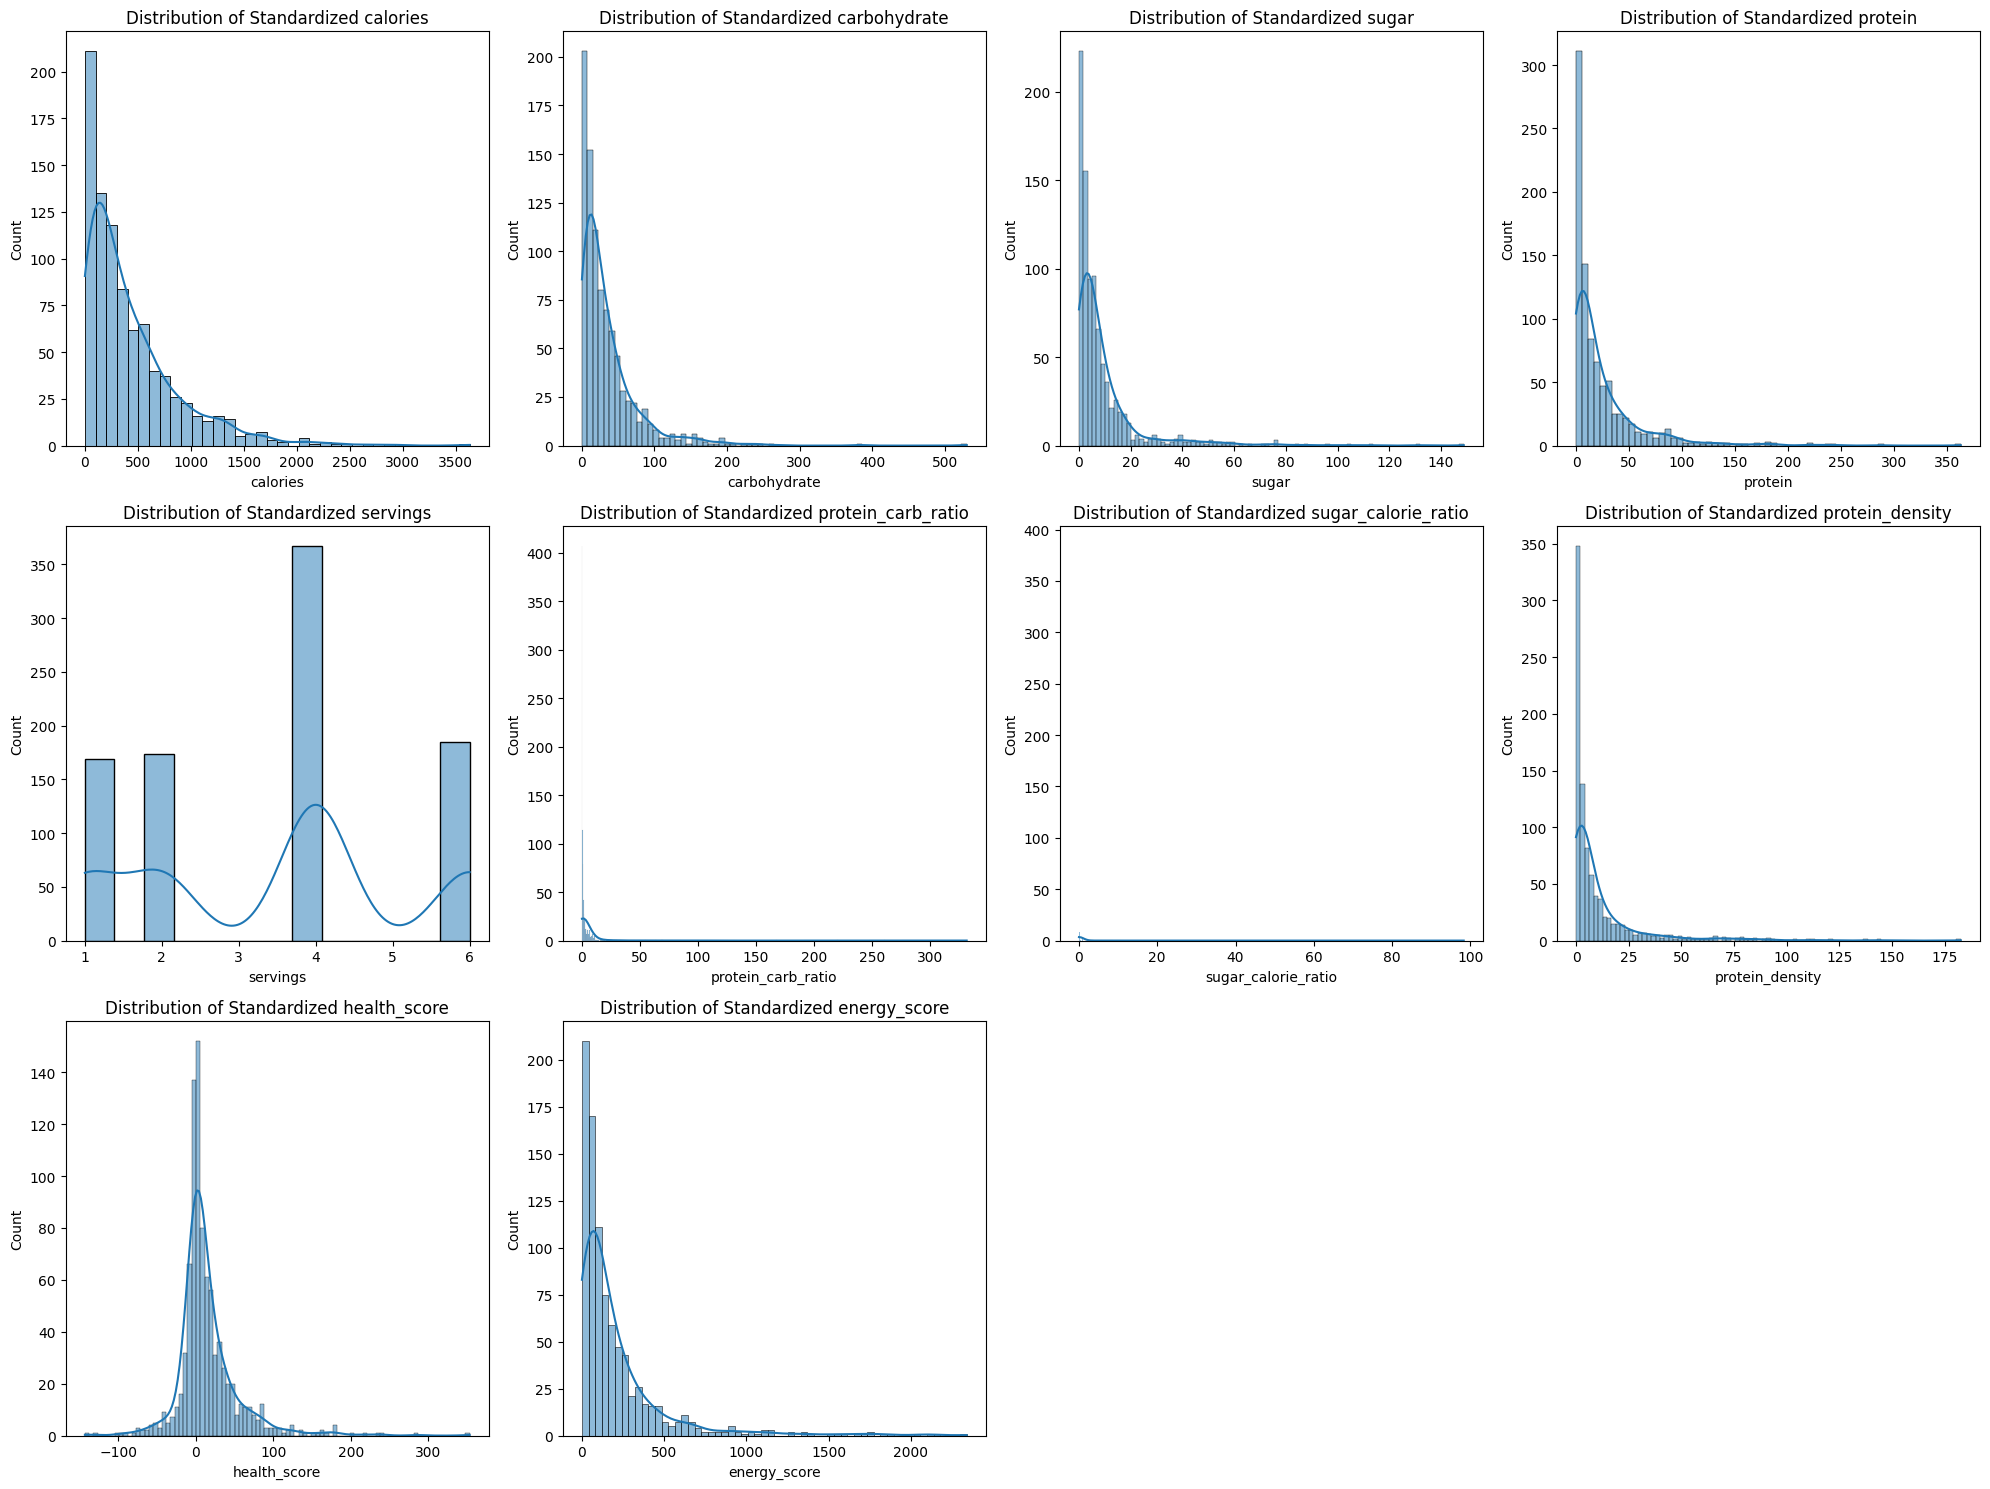

In [36]:
# histograms for numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of Standardized {var}')
plt.tight_layout()
plt.show()


As shown in the histograms, most of these features are right-skewed, and none follow similar distributions. This heterogeneity in the distributions suggests that certain machine learning algorithms, which assume normality, might not be optimal for this dataset.

Therefore, for subsequent modeling, it would be prudent to consider non-parametric machine learning models that do not rely on strong distributional assumptions. Algorithms such as **Decision Trees**, **Random Forests**, **XGBoost** and **Support Vector Machines (SVMs)** are suitable candidates for this purpose.

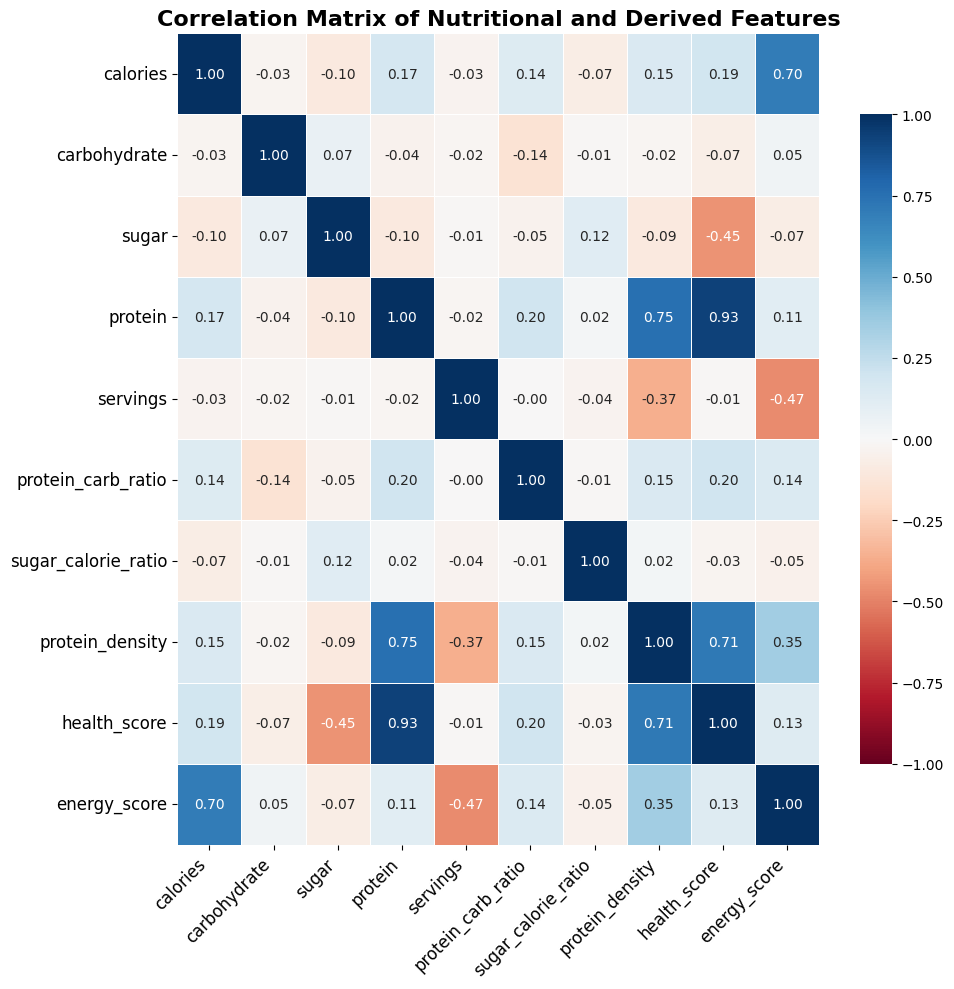

In [ ]:
# calculate the correlation matrix
corr_matrix = data[numerical_cols].corr()

# improved Heatmap Visualization
plt.figure(figsize=(10, 10))

# create the heatmap with modifications
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,  # show correlation values
    fmt=".2f",  # format correlation values to 2 decimal places
    cmap='RdBu',  # use a diverging color map (Red-Blue)
    vmin=-1,
    vmax=1,
    linewidths=0.5,  # add lines between cells for better separation
    linecolor='white',
    cbar_kws={'shrink': 0.8}  # shrink the colorbar
)

plt.title("Correlation Matrix of Nutritional and Derived Features", fontsize=16, fontweight='bold')  # more specific and prominent title
plt.xticks(rotation=45, ha='right', fontsize=12)  # rotate x-axis labels for readability
plt.yticks(rotation=0, fontsize=12)  # keep y-axis labels horizontal

plt.tight_layout()  # adjust layout to prevent labels from overlapping
plt.show()


Correlation analysis revealed notable relationships between nutritional and derived features, particularly the strong positive correlation between protein content and health score (0.93) and the negative correlation between sugar content and health score (-0.45).

Additionally, energy score exhibited a high correlation with calories (0.70), and servings showed a noteworthy negative correlation with energy score (-0.47) and protein_density (-0.37).

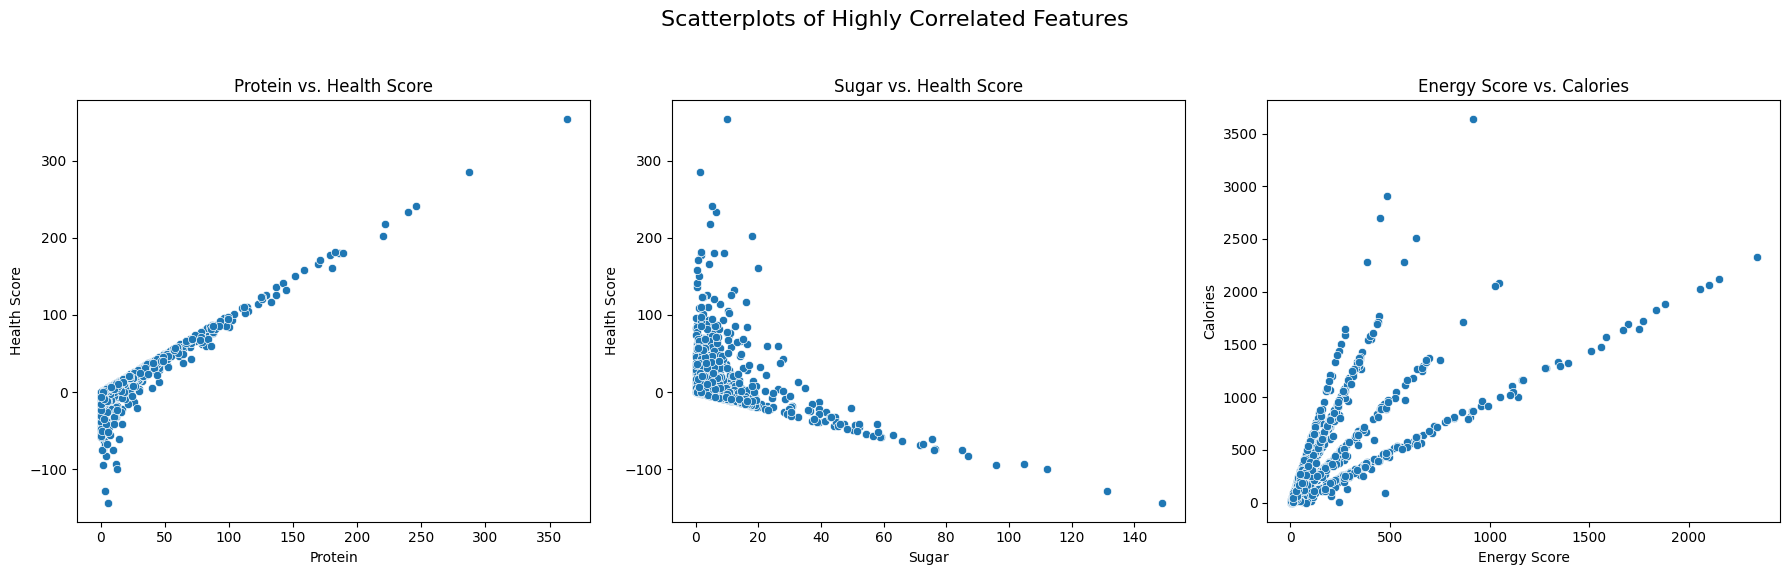

In [ ]:
# create a 1x3 grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # adjust figsize as needed
fig.suptitle('Scatterplots of Highly Correlated Features', fontsize=16)

# 1. scatterplot of protein vs. health_score
sns.scatterplot(x='protein', y='health_score', data=data, ax=axes[0])
axes[0].set_title('Protein vs. Health Score')
axes[0].set_xlabel('Protein')
axes[0].set_ylabel('Health Score')

# 2. scatterplot of sugar vs. health_score
sns.scatterplot(x='sugar', y='health_score', data=data, ax=axes[1])
axes[1].set_title('Sugar vs. Health Score')
axes[1].set_xlabel('Sugar')
axes[1].set_ylabel('Health Score')

# 3. scatterplot of energy_score vs. calories
sns.scatterplot(x='energy_score', y='calories', data=data, ax=axes[2])
axes[2].set_title('Energy Score vs. Calories')
axes[2].set_xlabel('Energy Score')
axes[2].set_ylabel('Calories')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust layout to prevent overlap
plt.show()

Based on the observed correlations in the heatmap and scatterplots, **health_score**, **protein**, **sugar**, **energy_score**, and **calories** appear to be the most influential features for predicting recipe popularity.  Their strong relationships and relevance to user preferences, such as health consciousness and dietary considerations, suggest they can effectively capture key factors driving recipe selection. While multicollinearity might be a concern between certain pairs, these features offer the most promising foundation for model training and evaluation.

## Train and Evaluate the Models

In [ ]:
# make basic imports
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

We will evaluate our models using two datasets.



*   The first, denoted as **X, y**, includes all available features to predict y.
*   The second, **X_some_features_excluded, y**, uses only the features **health_score**, **protein**, **sugar**, **energy_score**, and **calories** with the target variable, y


In [ ]:
# make X, y
X = data.drop('high_traffic', axis=1)

# select features to make X_some_features_excluded, y
features = ['health_score', 'sugar', 'calories', 'protein', 'energy_score']
X_some_features_excluded = data[features]
y = data['high_traffic']

In [ ]:
X.head() # print X

,calories,carbohydrate,sugar,protein,servings,Cat_Beverage,Cat_Dessert,Cat_Meal,Cat_Protein,Cat_Vegetable,protein_carb_ratio,sugar_calorie_ratio,protein_density,health_score,energy_score
1,35.48,38.56,0.66,0.92,4.0,0,0,0,0,1,0.023859,0.018602,0.230000,0.26,18.509995
2,914.28,42.68,3.09,2.88,1.0,0,0,1,0,0,0.067479,0.003380,2.879997,-0.21,956.959043
3,97.03,30.56,38.63,0.02,4.0,1,0,0,0,0,0.000654,0.398124,0.005000,-38.61,31.897492
4,27.05,1.85,0.80,0.53,4.0,1,0,0,0,0,0.286486,0.029575,0.132500,-0.27,7.224998
5,691.15,3.46,1.65,53.93,2.0,0,0,1,0,0,15.586701,0.002387,26.964987,52.28,347.304826


In [ ]:
X_some_features_excluded.head() # print X with only the 5 selected features

,health_score,sugar,calories,protein,energy_score
1,0.26,0.66,35.48,0.92,18.509995
2,-0.21,3.09,914.28,2.88,956.959043
3,-38.61,38.63,97.03,0.02,31.897492
4,-0.27,0.80,27.05,0.53,7.224998
5,52.28,1.65,691.15,53.93,347.304826


In [ ]:
y.head() # print y (target column)

,high_traffic
1,1
2,0
3,1
4,0
5,1


In [ ]:
# split the datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y) # use stratify for class imbalance

X_some_features_excluded_train, X_some_features_excluded_test, \
y_train_some_features_excluded, y_test_some_features_excluded = train_test_split(X_some_features_excluded,
                                                                                 y,
                                                                                 test_size=0.2,
                                                                                 random_state=42,
                                                                                 stratify=y)

In [ ]:
# scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_some_features_excluded_train_scaled = scaler.fit_transform(X_some_features_excluded_train)
X_some_features_excluded_test_scaled = scaler.transform(X_some_features_excluded_test)

### Train the two datasets using XGBoost classifier

In [ ]:
# tune XGBoost classifier using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# tune for the first dataset
grid_search_full = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_full.fit(X_train_scaled, y_train)
best_model_full = grid_search_full.best_estimator_

# tune for the second dataset
grid_search_selected = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_selected.fit(X_some_features_excluded_train_scaled, y_train_some_features_excluded)
best_model_selected = grid_search_selected.best_estimator_

In [ ]:
# train and evaluate XGBoost classifier on the first dataset (scaled, tuned)
y_pred_full_features = best_model_full.predict(X_test_scaled)

# train and evaluate XGBoost classifier on the second dataset (scaled, tuned)
y_pred_selected_features = best_model_selected.predict(X_some_features_excluded_test_scaled)

In [ ]:
summary_data = {
    'Dataset': ['All Features', 'Selected Features'],
    'Accuracy': [accuracy_score(y_test, y_pred_full_features), accuracy_score(y_test_some_features_excluded, y_pred_selected_features)],
    'Precision (Weighted Avg)': [classification_report(y_test, y_pred_full_features, output_dict=True)['weighted avg']['precision'],
                                 classification_report(y_test_some_features_excluded, y_pred_selected_features, output_dict=True)['weighted avg']['precision']],
    'Recall (Weighted Avg)': [classification_report(y_test, y_pred_full_features, output_dict=True)['weighted avg']['recall'],
                               classification_report(y_test_some_features_excluded, y_pred_selected_features, output_dict=True)['weighted avg']['recall']],
    'F1-Score (Weighted Avg)': [classification_report(y_test, y_pred_full_features, output_dict=True)['weighted avg']['f1-score'],
                                 classification_report(y_test_some_features_excluded, y_pred_selected_features, output_dict=True)['weighted avg']['f1-score']]
}

summary_df = pd.DataFrame(summary_data)

print("\nSummary DataFrame:")
summary_df


Summary DataFrame:


,Dataset,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,All Features,0.703911,0.739364,0.703911,0.665652
1,Selected Features,0.648045,0.650088,0.648045,0.602567


The XGBoost model's performance varied depending on the feature set used; when trained and evaluated on all available features, it achieved an accuracy of approximately 70.39%, with a weighted average precision of 73.94%, recall of 70.39%, and an F1-score of 66.57%, indicating moderate predictive capability.

However, when the model was trained using only the selected features, performance declined across all metrics, resulting in an accuracy of 64.80%, precision of 65.01%, recall of 64.80%, and an F1-score of 60.26%. This suggests that the excluded features contained important information for the model's predictions, and that further refinement of feature selection or model optimization is warranted to improve overall accuracy, particularly when using the reduced feature set.

### Use SVM model to do the same training and evaluation process

In [ ]:
# tune SVM classifier using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# tune for the first dataset (all features)
grid_search_svm_full = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm_full.fit(X_train_scaled, y_train)
best_model_svm_full = grid_search_svm_full.best_estimator_

# tune for the second dataset (selected features)
grid_search_svm_selected = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm_selected.fit(X_some_features_excluded_train_scaled, y_train_some_features_excluded)
best_model_svm_selected = grid_search_svm_selected.best_estimator_

In [ ]:
# train and evaluate SVM classifier on the first dataset (scaled, tuned)
y_pred_svm_full = best_model_svm_full.predict(X_test_scaled)

# train and evaluate SVM classifier on the second dataset (scaled, tuned)
y_pred_svm_selected = best_model_svm_selected.predict(X_some_features_excluded_test_scaled)

In [ ]:
summary_table_svm = pd.DataFrame({
    'Dataset': ['All Features', 'Selected Features'],
    'Accuracy': [accuracy_score(y_test, y_pred_svm_full), accuracy_score(y_test_some_features_excluded, y_pred_svm_selected)],
    'Precision (Weighted Avg)': [classification_report(y_test, y_pred_svm_full, output_dict=True, zero_division=0)['weighted avg']['precision'],
                                classification_report(y_test_some_features_excluded, y_pred_svm_selected, output_dict=True, zero_division=0)['weighted avg']['precision']],
    'Recall (Weighted Avg)': [classification_report(y_test, y_pred_svm_full, output_dict=True)['weighted avg']['recall'],
                             classification_report(y_test_some_features_excluded, y_pred_svm_selected, output_dict=True)['weighted avg']['recall']],
    'F1-Score (Weighted Avg)': [classification_report(y_test, y_pred_svm_full, output_dict=True)['weighted avg']['f1-score'],
                                 classification_report(y_test_some_features_excluded, y_pred_svm_selected, output_dict=True)['weighted avg']['f1-score']]
})

print("\nSVM Summary DataFrame:")
summary_table_svm


SVM Summary DataFrame:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Dataset,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,All Features,0.715084,0.777623,0.715084,0.671711
1,Selected Features,0.597765,0.357323,0.597765,0.447279


The **Support Vector Machine** model demonstrated a notable difference in performance depending on the feature set employed; when trained on all features, it achieved an accuracy of 71.51%, precision of 77.76%, recall of 71.51%, and an F1-score of 67.17%, indicating reasonable predictive capability.

However, the model's performance significantly declined when trained with only the selected features, resulting in an accuracy of 59.78%, a drastically reduced precision of 35.73%, recall of 59.78%, and an F1-score of 44.73. This sharp drop, particularly in precision, highlights the critical importance of the excluded features for the SVM's accurate classification and suggests a potential class imbalance issue that needs to be addressed, along with a reevaluation of the feature selection process and consideration of alternative modeling approaches.

## Discuss the Results

When comparing the XGBoost and SVM models, the SVM generally performed slightly better with all features, achieving a higher accuracy (71.51% vs. 70.39%), precision (77.76% vs. 73.94%), recall (71.51% vs. 70.39%), and F1-score (67.17% vs. 66.57%) than XGBoost, suggesting a slight advantage for SVM in minimizing false positives in this context.

However, the SVM's performance dramatically declined when using only the selected feature set, with accuracy dropping to 59.78% and precision plummeting to 35.73%, while XGBoost, although also experiencing a decrease, maintained a more robust performance with an accuracy of 64.80% and precision of 65.01%. This indicates that SVM is more sensitive to feature reduction and relies heavily on the excluded features for accurate predictions, whereas XGBoost demonstrates greater resilience and adaptability when using a limited feature set.

## Metrics for Business Monitoring

To effectively monitor their goal of increasing traffic through featured recipes, the business should adopt a metric that aligns closely with their objective of showcasing only high-performing content.

A suitable metric in this context is **Precision for High Traffic Predictions**, which measures the proportion of recipes predicted to generate high traffic that actually do so. This metric is particularly valuable because it minimizes the risk of displaying underperforming recipes, which could dilute user engagement and reduce potential conversions.

Unlike overall accuracy, which treats all correct predictions equally, precision focuses specifically on the correctness of positive predictions — a crucial consideration for homepage optimization. The business should regularly track this metric, preferably through a dashboard, and monitor it over time alongside complementary indicators such as click-through rates and subscription conversions.

Based on the initial data analysis and modeling conducted, we can estimate a baseline for this metric using the current model’s performance. After training a classification model to predict high traffic recipes and evaluating its outputs, we compute the precision score to determine the percentage of predicted high-traffic recipes that were indeed high traffic.

Suppose the model achieved a precision of approximately 74.2% — this would represent the initial benchmark for the business to monitor. From this baseline, the team can iterate on model improvements with the aim of reaching or exceeding the business-defined target of 80% precision, ensuring that the homepage consistently highlights recipes that drive the most user engagement and traffic.

## Recomendations

The key findings of this analysis indicate that the Support Vector Machine (SVM) model, when trained using all available features, demonstrated the strongest predictive performance. It achieved the highest balance of precision and recall, as reflected in its F1-score. Therefore, it is recommended that Tasty Bytes deploy this SVM model to predict high-traffic recipes.

However, it is crucial to emphasize that model deployment is not the final step. Continuous monitoring of the model's performance is essential to ensure its ongoing effectiveness. The primary metric to monitor is the F1-score for the "High Traffic" class, along with precision and recall, on a weekly basis. An automated system should be established to log data, calculate these metrics, and generate reports, enabling proactive identification of any performance degradation.

Periodic retraining of the model with new data is also recommended to maintain its accuracy and adapt to evolving user preferences and recipe trends. Retraining should be triggered if the F1-score declines by a predefined threshold or if significant changes occur in the recipe data distribution.

Furthermore, opportunities for future improvement exist. Gathering additional data, such as user click data, recipe ratings, and social media engagement, could provide valuable insights for enhancing the model's predictive power. Exploring advanced feature engineering techniques, experimenting with alternative machine learning models, and fine-tuning model hyperparameters are also avenues worth pursuing.

Ultimately, by implementing these recommendations, Tasty Bytes can leverage data-driven insights to optimize recipe selection, increase website traffic, and drive subscription growth.